In [2]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/sichenglei/Desktop/kaggle/salt/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)

Bad key "ckend" on line 1 in
/Users/sichenglei/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/Users/sichenglei/Desktop/kaggle/salt/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
val_images = train_images[:500]
val_labels = train_labels[:500]

In [7]:
train_images = train_images[500:]
train_labels = train_labels[500:]

In [7]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_acc',  
        patience=1 
    )
]

In [9]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Train on 59500 samples, validate on 500 samples
Epoch 1/10
59500/59500 [==============================] - 9s 144us/step - loss: 1.0726 - acc: 0.6874 - val_loss: 0.3805 - val_acc: 0.8940
Epoch 2/10
59500/59500 [==============================] - 5s 88us/step - loss: 0.3477 - acc: 0.8970 - val_loss: 0.2823 - val_acc: 0.9160
Epoch 3/10
59500/59500 [==============================] - 5s 88us/step - loss: 0.2686 - acc: 0.9207 - val_loss: 0.2273 - val_acc: 0.9340
Epoch 4/10
59500/59500 [==============================] - 5s 90us/step - loss: 0.2298 - acc: 0.9326 - val_loss: 0.1958 - val_acc: 0.9440
Epoch 5/10
59500/59500 [==============================] - 5s 84us/step - loss: 0.2023 - acc: 0.9405 - val_loss: 0.1980 - val_acc: 0.9460
Epoch 6/10
59500/59500 [==============================] - 5s 83us/step - loss: 0.1820 - acc: 0.9466 - val_loss: 0.1779 - val_acc: 0.9540
Epoch 7/10
59500/59500 [==============================] - 5s 78us/step - loss: 0.1648 - acc: 0.9510 - val_loss: 0.1608 - val_acc:

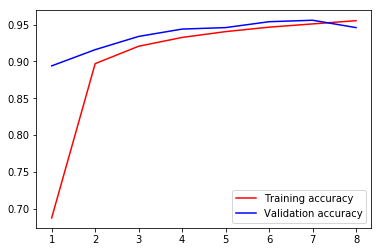

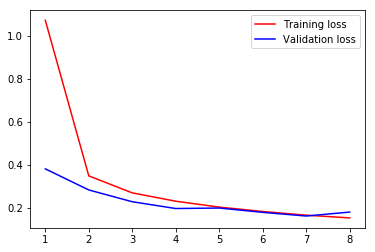

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Trianing and validation loss')
plt.legend()

plt.show()

In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/step


[0.17441026499047876, 0.9479]

In [22]:
def auto_run():
    for op in ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']:
        for l in [12]:
            model = models.Sequential()
            model.add(layers.Flatten())
            for i in range(l):
                model.add(layers.Dense(100, activation='relu'))
            model.add(layers.Dense(10, activation='softmax'))

            model.compile(optimizer=op,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
            model.fit(train_images, train_labels, epochs=15, batch_size=64, callbacks=callbacks_list,
              validation_data=(val_images, val_labels))
            print ('optimizer: {}, # layers: {}'.format(op, l))
            print (model.evaluate(test_images, test_labels))
        

In [23]:
auto_run()

Train on 59500 samples, validate on 500 samples
Epoch 1/15
59500/59500 [==============================] - 10s 161us/step - loss: 2.2849 - acc: 0.1669 - val_loss: 2.2084 - val_acc: 0.3080
Epoch 2/15
59500/59500 [==============================] - 6s 102us/step - loss: 1.3123 - acc: 0.5579 - val_loss: 0.7665 - val_acc: 0.7420
Epoch 3/15
59500/59500 [==============================] - 6s 95us/step - loss: 0.4428 - acc: 0.8669 - val_loss: 0.2879 - val_acc: 0.9140
Epoch 4/15
59500/59500 [==============================] - 5s 91us/step - loss: 0.2688 - acc: 0.9221 - val_loss: 0.2898 - val_acc: 0.9080
optimizer: sgd, # layers: 12
10000/10000 [==============================] - 1s 90us/step
[0.3160898743391037, 0.9038]
Train on 59500 samples, validate on 500 samples
Epoch 1/15
59500/59500 [==============================] - 9s 153us/step - loss: 0.4842 - acc: 0.8393 - val_loss: 0.1887 - val_acc: 0.9560
Epoch 2/15
59500/59500 [==============================] - 6s 99us/step - loss: 0.1899 - acc: 0.95